## **Q1. 부모의 학력과 자녀의 대학진학여부 관계 검토**

- cleanDescriptive.csv 파일을 읽어와 level2와 pass2 변수를 이용해 부모의 학력과 자녀의 대학진학여부가 관계가 있는지 검토 실시

귀무가설 : 부모의 학력과 자녀의 대학진학여부가 관계가 없다.  
대립가설 : 부모의 학력과 자녀의 대학진학여부가 관계가 있다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
cd = pd.read_csv('C:/Users/admin/Desktop/210614~/210614/데이터/cleanDescriptive.csv', engine = 'python')

In [3]:
cd.head()

,resident,gender,age,level,cost,type,survey,pass,cost2,resident2,gender2,age2,level2,pass2
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0,2.0,특별시,남자,장년층,고졸,실패
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0,2.0,광역시,남자,장년층,대졸,실패
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0,2.0,NaN,남자,노년층,대졸,합격
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0,NaN,광역시,여자,장년층,NaN,합격
4,5.0,1,51,1.0,5.0,1.0,3.0,1.0,2.0,시구군,남자,장년층,고졸,합격


In [4]:
df_cross = pd.crosstab(cd['level2'],cd['pass2'])

In [32]:
df_cross

pass2,실패,합격
level2,,
고졸,40,49
대졸,27,55
대학원졸,23,31


In [34]:
chi2, p, dof, ef = stats.chi2_contingency(df_cross, correction = False)

In [35]:
# 카이제곱통계량
chi2

2.766951202595669

In [36]:
# p-value
p

0.25070568406521354

In [37]:
# 자유도
dof

2

In [38]:
# 기대빈도
ef

array([[35.6, 53.4],
       [32.8, 49.2],
       [21.6, 32.4]])

### **p-value = 0.25 > 0.05이므로 귀무가설을 기각할 수 없다 ==> 부모의 학력과 자녀의 대학진학여부는 관계가 없다고 보여진다.**

## **Q2. diamonds 분석**

seaborn 라이브러리의 diamonds 데이터셋을 활용해 아래를 수행해보세요

- 데이터 로드 방법

In [5]:
import seaborn as sns

In [6]:
dia = sns.load_dataset('diamonds')

In [7]:
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null category
color      53940 non-null category
clarity    53940 non-null category
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### **2-1) price와 상관성이 높은 변수는?**

In [9]:
dia.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


### **carat, x, y, z가 price와 상관성이 높다**

### **2-2) price 변수의 확률밀도함수로 분포 확인**

In [29]:
pd.crosstab(dia['cut'], dia['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [30]:
chi, p, dof, ef = stats.chi2_contingency(pd.crosstab(dia['cut'], dia['color']))

In [31]:
p

1.3945120919852248e-51

p-value는 현저히 낮게 나타났고 cut과 color 변수간 관계가 없다(독립적이다)는 귀무가설을 기각한다. 따라서 cut과 color 두 변수는 서로 관련이 있다.

In [32]:
dia['cut'].cat.codes

0        0
1        1
2        3
3        1
4        3
        ..
53935    0
53936    3
53937    2
53938    1
53939    0
Length: 53940, dtype: int8

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


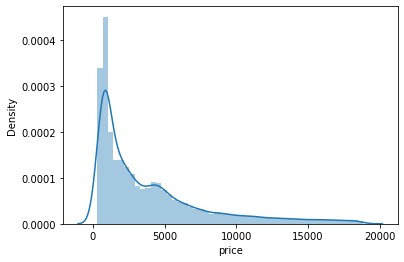

In [33]:
sns.distplot(dia['price'])

### **2-3) 아래의 조건에 따라 price2변수를 범주형 변수로 생성** 

- 1분위수 미만: 'low'

- iqr : 'mid'

- 윗 극단치 경계 이하 : 'high'

- 15000미만 : 'vh' (very high)

- 그 이상 : 'sp' (special)

In [16]:
dia['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [17]:
hbound = 5324.25 + 1.5*(5324.25-950)

In [18]:
bins = [0, 950, 5324.25, hbound, 15000, 19000]

In [19]:
bins_label = ['low','mid','high','vh','sp']

In [20]:
dia['price2'] = pd.cut(dia['price'], bins, right = False, labels = bins_label)

In [21]:
dia['price2'].unique()

[low, mid, high, vh, sp]
Categories (5, object): [low < mid < high < vh < sp]

### **2-4) cut 변수와 price2변수는 서로 관련이 있는지 판단**  
귀무가설 : cut변수와 price2변수는 서로 관련이 없다.  
대립가설 : cut변수와 price2변수는 서로 관련이 있다.

In [22]:
dia_cross = pd.crosstab(dia['cut'],dia['price2'])

In [23]:
dia_cross

price2,low,mid,high,vh,sp
cut,,,,,
Ideal,6304,10645,3443,627,532
Premium,2905,6575,3053,671,587
Very Good,3129,5902,2294,390,367
Good,1057,2721,863,136,129
Fair,88,1129,292,60,41


In [24]:
chi2, p, dof, ef = stats.chi2_contingency(dia_cross)

In [25]:
chi2

1069.5132514820355

In [26]:
p

1.4405308712486761e-217

In [27]:
dof

16

In [28]:
ef

array([[ 5386.95092696, 10776.29907304,  3973.3907119 ,   752.72680756,
          661.63248053],
       [ 3447.23865406,  6896.01134594,  2542.66768632,   481.68787542,
          423.39443826],
       [ 3020.05202076,  6041.44797924,  2227.57675195,   421.99644049,
          370.92680756],
       [ 1226.31809418,  2453.18190582,   904.52669633,   171.35528365,
          150.61802002],
       [  402.44030404,   805.05969596,   296.8381535 ,    56.23359288,
           49.42825362]])

### **p-value가 매우 작으므로 귀무가설을 기각할 수 있다 ==> cut변수와 price2변수는 서로 관련이 있다고 보여진다**